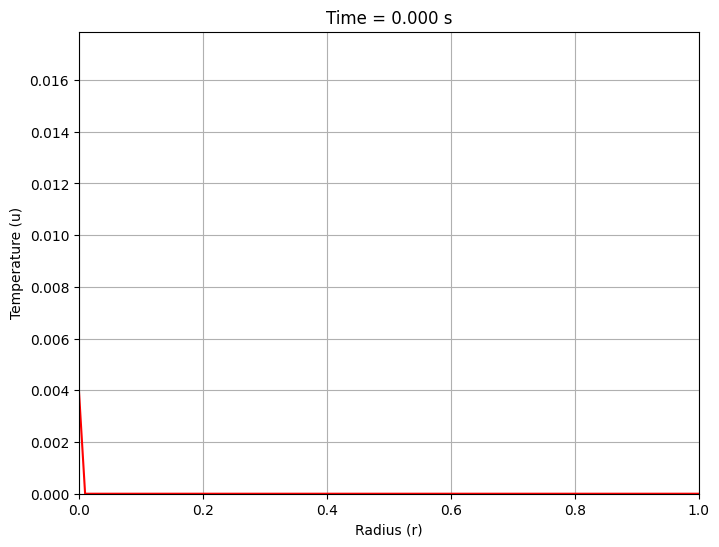

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Domain parameters
R = 1.0       # Radius of the circular domain
n = 100       # Number of radial divisions
dr = R / n    # Radial step size

r = np.linspace(0, R, n+1)  # Radial coordinate array

# Time-stepping parameters
alpha = 1.0  # Thermal diffusivity
dt = 0.4 * dr**2 / alpha  # Time step size (stability condition)
total_time = 0.5          # Total simulation time
nt = int(total_time / dt)  # Number of time steps

# Initial condition: temperature is zero everywhere
u = np.zeros(n+1)

# Heat source: q = 1 at r = 0 (center)
q = np.zeros(n+1)
q[0] = 100.0  # Increased heat source at the center

# Prepare to store solutions for visualization
num_plots = 50  # Number of snapshots to visualize
plot_interval = max(1, nt // num_plots)
solutions = []

# Time-stepping loop
for t in range(nt):
    # Create a copy of the current temperature distribution
    u_old = u.copy()

    # Update at r = 0 (center)
    # Second derivative approximation at r=0: u_rr = (u[1] - u[0]) / dr^2
    u_rr_0 = (u_old[1] - u_old[0]) / dr**2
    u[0] = u_old[0] + dt * (alpha * (2 * u_rr_0) + q[0])

    # Update interior points using finite differences
    for i in range(1, n):
        u_rr = (u_old[i+1] - 2*u_old[i] + u_old[i-1]) / dr**2
        u_r = (u_old[i+1] - u_old[i-1]) / (2*dr)
        u[i] = u_old[i] + dt * alpha * (u_rr + (1/r[i])*u_r)

    # Boundary condition at r = R (edge)
    u[-1] = 0.0  # Dirichlet condition: u = 0 at r = R

    # Store solutions for visualization at specified intervals
    if t % plot_interval == 0:
        solutions.append(u.copy())

# Visualization
fig, ax = plt.subplots(figsize=(8, 6))

def update_plot(frame):
    ax.clear()
    ax.plot(r, solutions[frame], color='red')
    ax.set_xlim(0, R)
    ax.set_ylim(0, np.max(solutions[-1]) * 1.1)
    ax.set_xlabel('Radius (r)')
    ax.set_ylabel('Temperature (u)')
    ax.set_title(f'Time = {frame * dt * plot_interval:.3f} s')
    ax.grid(True)

anim = FuncAnimation(fig, update_plot, frames=len(solutions), interval=200)

# Display the animation in the notebook
HTML(anim.to_jshtml())
